In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#loading data as a pandas dataframe
purchases = pd.read_csv("Purchases.txt", header=None, sep='\t', decimal='.')

# Basic Understanding of data

In [4]:
#to know how big dataset is
purchases.shape

(51243, 3)

In [5]:
# to know how data looks like
purchases.head(10)

,0,1,2
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25
5,1960,40.0,2013-10-29
6,2620,30.0,2006-03-09
7,3050,50.0,2007-04-12
8,3120,150.0,2006-11-08
9,3260,45.0,2010-10-20


In [6]:
#renaming columns name
purchases.columns = ['customer_id', 'purchase_amount', 'date_of_purchase']
#converting date to datetime
purchases['date_of_purchase'] = pd.to_datetime(purchases['date_of_purchase'], format="%Y-%m-%d")
purchases.head()

,customer_id,purchase_amount,date_of_purchase
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [7]:
# to know datatype of columns
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       51243 non-null  int64         
 1   purchase_amount   51243 non-null  float64       
 2   date_of_purchase  51243 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


In [8]:
# to check missing values
purchases.isnull().sum()

customer_id         0
purchase_amount     0
date_of_purchase    0
dtype: int64

# EDA

In [10]:
purchases.describe()

,customer_id,purchase_amount,date_of_purchase
count,51243.000000,51243.000000,51243
mean,108934.547938,62.337195,2011-07-14 01:27:23.721093632
min,10.000000,5.000000,2005-01-02 00:00:00
25%,57720.000000,25.000000,2009-01-17 00:00:00
50%,102440.000000,30.000000,2011-11-23 00:00:00
75%,160525.000000,60.000000,2013-12-29 00:00:00
max,264200.000000,4500.000000,2015-12-31 00:00:00
std,67650.610139,156.606801,NaN


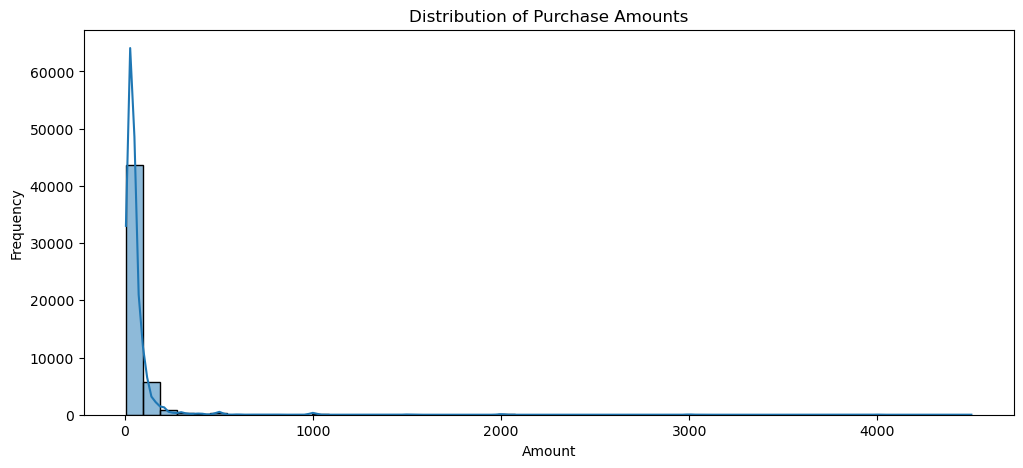

In [11]:
# Univariate Analysis
plt.figure(figsize=(12, 5))
sn.histplot(purchases['purchase_amount'], bins=50, kde=True)
plt.title("Distribution of Purchase Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Calculating RFM

In [13]:
#extracting year
purchases['year_of_purchase'] = purchases['date_of_purchase'].dt.year

# Calculate the number of days since purchase from 01-01-2016
reference_date = pd.to_datetime('2016-01-01')
purchases['days_since'] = (reference_date - purchases['date_of_purchase']).dt.days

# Display the updated dataframe
purchases.head()

,customer_id,purchase_amount,date_of_purchase,year_of_purchase,days_since
0,760,25.0,2009-11-06,2009,2247
1,860,50.0,2012-09-28,2012,1190
2,1200,100.0,2005-10-25,2005,3720
3,1420,50.0,2009-07-09,2009,2367
4,1940,70.0,2013-01-25,2013,1071


In [14]:
# Calculate the frequency of each unique Cust ID
purchases['Frequency'] = purchases.groupby('customer_id')['customer_id'].transform('count')

# Calculate the total purchase amount for each unique Cust ID
purchases['Total_Purchase_Amount'] = purchases.groupby('customer_id')['purchase_amount'].transform('sum')

# Calculate the average monetary value
purchases['Average_Monetary_Value'] = purchases['Total_Purchase_Amount'] / purchases['Frequency']

# Calculate ''recency' for each 'cust ID'
purchases['recency'] = purchases.groupby('customer_id')['days_since'].transform('min')

# Display the updated dataframe
purchases.head()

,customer_id,purchase_amount,date_of_purchase,year_of_purchase,days_since,Frequency,Total_Purchase_Amount,Average_Monetary_Value,recency
0,760,25.0,2009-11-06,2009,2247,5,190.0,38.000000,1273
1,860,50.0,2012-09-28,2012,1190,10,540.0,54.000000,237
2,1200,100.0,2005-10-25,2005,3720,9,925.0,102.777778,1192
3,1420,50.0,2009-07-09,2009,2367,34,1735.0,51.029412,24
4,1940,70.0,2013-01-25,2013,1071,10,475.0,47.500000,686


In [15]:
# removing unnecessary columns
purchases.drop(columns=['purchase_amount','date_of_purchase','days_since','Total_Purchase_Amount'],inplace=True)

In [16]:
purchases.sample(10)

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency
37842,104450,2008,2,20.000000,1570
31174,248760,2015,1,50.000000,154
75,11070,2006,5,26.000000,2053
27036,32920,2010,14,101.785714,216
50377,173430,2012,4,12.500000,15
21878,72130,2008,6,54.166667,1289
9109,115330,2013,6,13.333333,384
44194,204150,2015,3,50.000000,272
12123,48630,2011,2,55.000000,1462
19772,173850,2012,4,11.250000,44


In [17]:
# to check duplicated values
purchases.duplicated().sum()

6277

In [18]:
#remove them
purchases = purchases.drop_duplicates()

In [19]:
purchases.shape

(44966, 5)

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare the data for clustering
X = purchases[['recency', 'Frequency', 'Average_Monetary_Value']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
purchases['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows of the dataframe with cluster labels
purchases.head()

C:\Users\firef\AppData\Local\Temp\ipykernel_5644\2822019472.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['Cluster'] = kmeans.fit_predict(X)


,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
0,760,2009,5,38.000000,1273,5
1,860,2012,10,54.000000,237,7
2,1200,2005,9,102.777778,1192,5
3,1420,2009,34,51.029412,24,2
4,1940,2013,10,47.500000,686,0


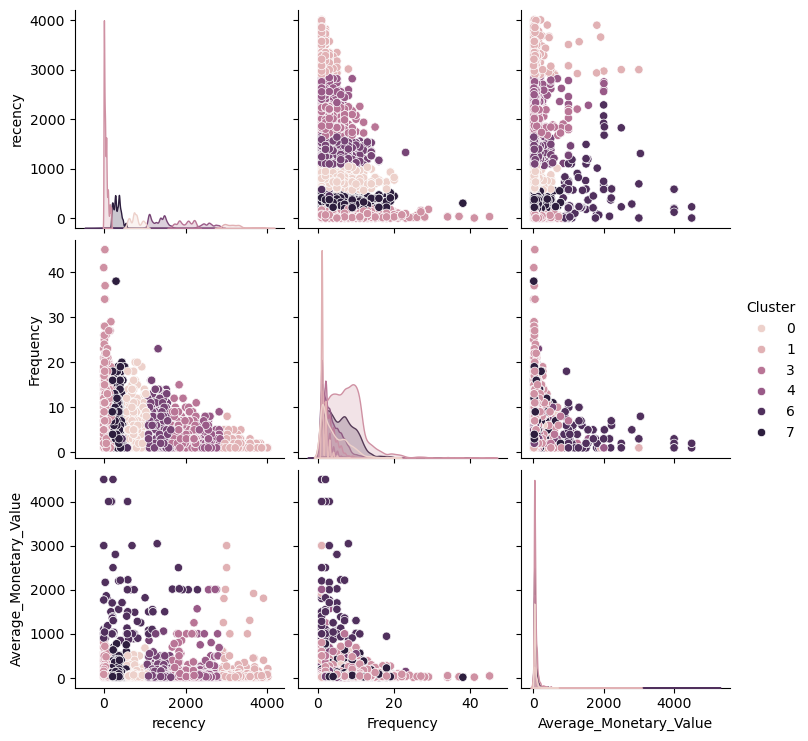

In [21]:
# Optional: Visualize the clustering results
sns.pairplot(purchases, hue='Cluster', vars=['recency', 'Frequency', 'Average_Monetary_Value'])
plt.show()

In [22]:
# Creating 7 dataframes, one for each cluster
cluster_0 = purchases[purchases['Cluster'] == 0]
cluster_1 = purchases[purchases['Cluster'] == 1]
cluster_2 = purchases[purchases['Cluster'] == 2]
cluster_3 = purchases[purchases['Cluster'] == 3]
cluster_4 = purchases[purchases['Cluster'] == 4]
cluster_5 = purchases[purchases['Cluster'] == 5]
cluster_6 = purchases[purchases['Cluster'] == 6]
cluster_7 = purchases[purchases['Cluster'] == 7]

# Displaying the number of records in each cluster dataframe
cluster_counts = {
    'Cluster 0': len(cluster_0),
    'Cluster 1': len(cluster_1),
    'Cluster 2': len(cluster_2),
    'Cluster 3': len(cluster_3),
    'Cluster 4': len(cluster_4),
    'Cluster 5': len(cluster_5),
    'Cluster 6': len(cluster_6),
    'Cluster 7': len(cluster_7)
}

cluster_counts


{'Cluster 0': 5190,
 'Cluster 1': 2391,
 'Cluster 2': 15749,
 'Cluster 3': 4316,
 'Cluster 4': 2545,
 'Cluster 5': 6074,
 'Cluster 6': 243,
 'Cluster 7': 8458}

In [23]:
cluster_0

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
4,1940,2013,10,47.500000,686,0
32,7000,2013,6,13.333333,1001,0
33,7210,2009,9,42.222222,567,0
36,7660,2006,13,32.692308,1009,0
37,7660,2013,13,32.692308,1009,0
...,...,...,...,...,...,...
51191,205860,2013,1,20.000000,801,0
51193,183900,2012,2,25.000000,856,0
51194,184130,2013,2,60.000000,945,0
51225,109380,2011,5,44.000000,611,0


In [24]:
cluster_1

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
16,4840,2005,1,30.000000,3731,1
23,6240,2006,3,76.666667,3005,1
24,6390,2005,1,15.000000,3720,1
26,6600,2005,3,50.000000,3288,1
39,7740,2007,4,107.500000,3067,1
...,...,...,...,...,...,...
51129,78070,2007,1,40.000000,3094,1
51177,79730,2007,1,10.000000,3068,1
51206,85740,2007,1,30.000000,2977,1
51221,78290,2007,1,10.000000,3087,1


In [25]:
cluster_2

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
3,1420,2009,34,51.029412,24,2
12,4000,2005,14,26.071429,126,2
13,4180,2010,10,18.000000,97,2
15,4750,2013,9,55.000000,25,2
22,5990,2006,22,29.545455,38,2
...,...,...,...,...,...,...
51227,131660,2009,7,41.142857,24,2
51230,230570,2014,3,60.000000,64,2
51231,232850,2015,2,50.000000,64,2
51238,163230,2011,5,68.000000,6,2


In [26]:
cluster_3

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
8,3120,2006,4,175.000000,2011,3
20,5250,2005,3,50.000000,2192,3
43,8190,2006,2,25.000000,2053,3
68,10700,2006,7,22.142857,2207,3
72,10950,2007,10,14.000000,2002,3
...,...,...,...,...,...,...
51090,52750,2010,3,30.000000,2018,3
51119,111370,2008,2,20.000000,2249,3
51130,80980,2008,3,30.000000,2194,3
51179,83120,2008,9,234.444444,1735,3


In [27]:
cluster_4

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
66,10630,2008,3,13.333333,2598,4
73,11000,2008,4,30.000000,2478,4
87,12480,2008,4,100.000000,2640,4
125,15580,2005,8,28.125000,2480,4
143,17330,2007,5,24.000000,2311,4
...,...,...,...,...,...,...
51151,24980,2006,7,30.000000,2443,4
51157,118480,2009,1,50.000000,2464,4
51167,83290,2008,1,20.000000,2557,4
51185,12790,2008,6,25.833333,2498,4


In [28]:
cluster_5

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
0,760,2009,5,38.000000,1273,5
2,1200,2005,9,102.777778,1192,5
6,2620,2006,2,30.000000,1387,5
9,3260,2010,7,41.428571,1224,5
11,3970,2007,7,29.285714,1057,5
...,...,...,...,...,...,...
51210,84410,2012,6,57.500000,1183,5
51211,114100,2008,2,22.500000,1470,5
51212,161670,2011,3,43.333333,1096,5
51233,46770,2012,2,30.000000,1392,5


In [29]:
cluster_6

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
183,39920,2007,5,1556.000000,366,6
235,54170,2010,10,1300.000000,232,6
376,76440,2010,5,2020.000000,1847,6
471,94390,2013,2,917.725000,793,6
695,144610,2011,18,944.444444,1,6
...,...,...,...,...,...,...
50268,79990,2013,4,1040.000000,22,6
50851,181880,2014,3,2000.000000,580,6
50911,54170,2014,10,1300.000000,232,6
51095,222650,2014,1,1000.000000,577,6


In [30]:
cluster_0.describe()

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.0
mean,128093.289017,2011.428324,4.388247,48.887947,777.342582,0.0
std,71643.911376,2.390030,3.547891,51.605445,131.448862,0.0
min,90.000000,2005.000000,1.000000,5.000000,553.000000,0.0
25%,65940.000000,2010.000000,1.000000,27.000000,686.000000,0.0
50%,137620.000000,2013.000000,3.000000,33.333333,762.000000,0.0
75%,198617.500000,2013.000000,7.000000,52.500000,861.000000,0.0
max,226560.000000,2014.000000,20.000000,677.777778,1051.000000,0.0


In [31]:
cluster_1.describe()

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
count,2391.000000,2391.000000,2391.00000,2391.000000,2391.000000,2391.0
mean,55324.023421,2006.455040,1.42409,48.597182,3193.026349,1.0
std,27668.697526,0.804516,0.80375,141.481013,256.497765,0.0
min,10.000000,2005.000000,1.00000,5.000000,2879.000000,1.0
25%,33525.000000,2006.000000,1.00000,20.000000,2977.000000,1.0
50%,61190.000000,2007.000000,1.00000,30.000000,3146.000000,1.0
75%,77825.000000,2007.000000,2.00000,45.000000,3293.000000,1.0
max,93550.000000,2008.000000,8.00000,3000.000000,4014.000000,1.0


In [32]:
cluster_2.describe()

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
count,15749.000000,15749.000000,15749.000000,15749.000000,15749.000000,15749.0
mean,119044.852372,2012.049590,7.392533,63.217218,46.570639,2.0
std,75734.445198,2.800612,4.774303,70.955754,47.597620,0.0
min,480.000000,2005.000000,1.000000,5.000000,1.000000,2.0
25%,57050.000000,2010.000000,4.000000,30.000000,9.000000,2.0
50%,112100.000000,2013.000000,7.000000,42.500000,31.000000,2.0
75%,179750.000000,2015.000000,10.000000,68.571429,65.000000,2.0
max,264200.000000,2015.000000,45.000000,826.250000,185.000000,2.0


In [33]:
cluster_3.describe()

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
count,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.0
mean,94411.445783,2008.942771,2.821362,46.657878,1992.197868,3.0
std,44157.868543,1.421476,1.893409,80.366370,177.083103,0.0
min,190.000000,2005.000000,1.000000,5.000000,1659.000000,3.0
25%,62115.000000,2008.000000,1.000000,20.000000,1836.750000,3.0
50%,103885.000000,2009.000000,2.000000,30.000000,2016.000000,3.0
75%,133332.500000,2010.000000,4.000000,47.625000,2158.000000,3.0
max,164960.000000,2011.000000,15.000000,1250.000000,2275.000000,3.0


In [34]:
cluster_4.describe()

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
count,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.0
mean,86398.703340,2007.957171,1.949312,44.882801,2561.962672,4.0
std,32484.505123,0.945515,1.287711,109.853063,154.629847,0.0
min,770.000000,2005.000000,1.000000,5.000000,2277.000000,4.0
25%,66690.000000,2008.000000,1.000000,20.000000,2443.000000,4.0
50%,97090.000000,2008.000000,2.000000,30.000000,2557.000000,4.0
75%,111090.000000,2009.000000,2.000000,40.000000,2696.000000,4.0
max,127710.000000,2009.000000,9.000000,2007.000000,2872.000000,4.0


In [35]:
cluster_5.describe()

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
count,6074.000000,6074.000000,6074.000000,6074.000000,6074.000000,6074.0
mean,107424.043464,2010.120678,3.641752,47.622684,1324.436450,5.0
std,56783.693489,2.015114,2.717031,60.495352,169.087674,0.0
min,120.000000,2005.000000,1.000000,5.000000,1051.000000,5.0
25%,62550.000000,2009.000000,1.000000,24.041667,1147.000000,5.0
50%,108620.000000,2011.000000,3.000000,31.250000,1359.500000,5.0
75%,161165.000000,2012.000000,5.000000,50.000000,1470.000000,5.0
max,193880.000000,2013.000000,23.000000,1060.000000,1654.000000,5.0


In [36]:
cluster_6.describe()

,customer_id,year_of_purchase,Frequency,Average_Monetary_Value,recency,Cluster
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.0
mean,131417.695473,2012.144033,5.168724,1532.859379,397.609053,6.0
std,77151.194522,2.596850,3.752730,815.882197,472.208788,0.0
min,3880.000000,2005.000000,1.000000,850.000000,1.000000,6.0
25%,74805.000000,2011.000000,2.000000,1000.000000,31.000000,6.0
50%,144610.000000,2013.000000,5.000000,1184.210000,217.000000,6.0
75%,190430.000000,2014.000000,8.000000,1808.470000,587.000000,6.0
max,263470.000000,2015.000000,18.000000,4500.000000,2291.000000,6.0
